In [2]:
import tuneta.tune_ta
import pandas as pd

from pandas_ta import percent_return

from sklearn.model_selection import train_test_split

import yfinance as yf

X = yf.download("SPY", period ="10y", interval ="1d", auto_adjust = True)
y = percent_return(X.Close, offset=-1)
X

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2012-10-01,119.731125,120.700439,119.308595,119.590286,135911200
2012-10-02,120.062527,120.253072,119.159493,119.714569,113422200
2012-10-03,120.037616,120.484986,119.407980,120.203308,121283100
2012-10-04,120.659007,121.238937,120.493315,121.064964,124311600
2012-10-05,121.711148,121.918267,120.708689,121.073219,124842100
...,...,...,...,...,...
2022-09-23,370.579987,370.619995,363.290009,367.950012,122210100
2022-09-26,366.410004,370.209991,363.029999,364.309998,92581200
2022-09-27,368.019989,370.399994,360.869995,363.380005,108294100


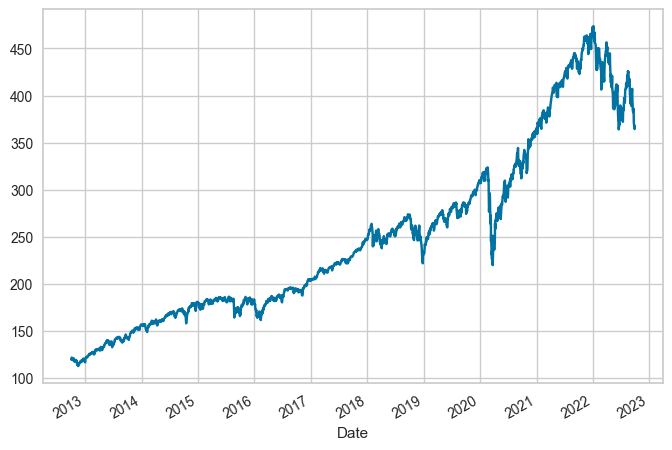

In [3]:
from tuneta.tune_ta import TuneTA

X["Open"].plot()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=False)
tt = TuneTA(n_jobs=6, verbose=True)

In [4]:
tt.fit(X_train, y_train, indicators=['all'],ranges=[(4, 30)],trials=100,early_stop=10,)

[I 2022-09-30 12:13:00,069] A new study created in memory with name: tta.BBANDS(X.close, timeperiod=trial.suggest_int('timeperiod', 4, 30), )
[I 2022-09-30 12:13:00,073] A new study created in memory with name: tta.DEMA(X.close, timeperiod=trial.suggest_int('timeperiod', 4, 30), )
[I 2022-09-30 12:13:00,075] A new study created in memory with name: tta.EMA(X.close, timeperiod=trial.suggest_int('timeperiod', 4, 30), )
[I 2022-09-30 12:13:00,078] A new study created in memory with name: tta.HT_TRENDLINE(X.close, )
[I 2022-09-30 12:13:00,081] A new study created in memory with name: tta.KAMA(X.close, timeperiod=trial.suggest_int('timeperiod', 4, 30), )
[I 2022-09-30 12:13:00,087] A new study created in memory with name: tta.MA(X.close, timeperiod=trial.suggest_int('timeperiod', 4, 30), )
[I 2022-09-30 12:13:00,102] Trial 0 finished with value: 0.06102137481738253 and parameters: {'timeperiod': 14}. Best is trial 0 with value: 0.06102137481738253.
[I 2022-09-30 12:13:00,104] Trial 0 finish

In [5]:
tt.fit_times()

     Indicator                  Times
---  -----------------------  -------
108  pta.amat                   11.27
 88  pta.increasing             11.02
 65  pta.decreasing             10.95
288  fta.SQZMI                   9.18
103  pta.qqe                     7.97
204  pta.hilo                    4.97
 59  pta.ttm_trend               4.07
173  pta.alma                    3.61
245  pta.mcgd                    3.54
 33  fta.MACD                    3.21
 58  fta.KST                     2.97
 56  fta.STOCHRSI                2.83
  5  fta.CMO                     2.74
156  fta.CHANDELIER              2.63
203  pta.kama                    2.58
195  pta.vidya                   2.55
240  pta.supertrend              2.55
200  fta.ICHIMOKU                2.49
254  pta.ssf                     2.4
129  pta.massi                   2.32
181  tta.DEMA                    2.22
 31  fta.WTO                     2.18
144  fta.ADX                     2.14
 55  pta.coppock                 2.13
 97  tta.STOC

In [6]:
tt.report(target_corr=True, features_corr=True)


Indicator Correlation to Target:

                                                                                    Correlation
--------------------------------------------------------------------------------  -------------
fta_QSTICK_period_20                                                                   0.396399
tta_CMO_timeperiod_27                                                                  0.260347
pta_cmo_length_27                                                                      0.260347
tta_RSI_timeperiod_27                                                                  0.260347
pta_rsi_length_27                                                                      0.260347
fta_CMO_period_18                                                                      0.256283
pta_bias_length_27_mamode_rma                                                          0.255702
fta_RSI_period_23                                                                      0.255407
pta_p

In [7]:
tt.prune(max_inter_correlation=.7)

In [8]:
features = tt.transform(X_train)
X_train = pd.concat([X_train, features], axis=1)

In [9]:
features

,fta_QSTICK_period_20,tta_RSI_timeperiod_27,pta_slope_length_20,pta_ttm_trend_length_24,pta_decreasing_length_16,pta_pdist,tta_AROONOSC_timeperiod_20,pta_amat_fast_7_slow_10_lookback_8_mamode_rma_0,pta_amat_fast_7_slow_10_lookback_8_mamode_rma_1,tta_VAR_timeperiod_10,...,tta_CDLSHOOTINGSTAR,tta_CDLADVANCEBLOCK,tta_CDLMORNINGDOJISTAR,tta_CDLLADDERBOTTOM,tta_CDL3LINESTRIKE,tta_CDLUPSIDEGAP2CROWS,tta_CDLTHRUSTING,tta_CDLHIKKAKEMOD,tta_CDLSTALLEDPATTERN,tta_CDLIDENTICAL3CROWS
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-01,NaN,NaN,NaN,-1,0,NaN,NaN,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
2012-10-02,NaN,NaN,NaN,-1,0,2.311442,NaN,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
2012-10-03,NaN,NaN,NaN,-1,0,2.311367,NaN,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
2012-10-04,NaN,NaN,NaN,-1,0,1.540986,NaN,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
2012-10-05,NaN,NaN,NaN,-1,0,2.427411,NaN,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-25,0.079098,54.332480,0.575060,1,0,5.708323,75.0,1,0,1.341986,...,0,0,0,0,0,0,0,0,0,0
2019-09-26,-0.030019,53.623651,0.449704,1,0,4.002465,75.0,1,0,1.412800,...,0,0,0,0,0,0,0,0,0,0
2019-09-27,-0.115787,51.812206,0.198454,1,1,6.594665,60.0,1,0,1.939317,...,0,0,0,0,0,0,0,0,0,0
